In [1]:
# Uncomment and run if you do not have these packages installed or are outdated
#!pip install kemlglearn --upgrade
#!pip install scikit-learn --upgrade

# Dimensionality Reduction

In [2]:
%matplotlib notebook
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from kemlglearn.datasets import make_blobs
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import Isomap
from sklearn.datasets import make_moons




## Linear data

Now we will use different methods of dimensionalty reduction using some specific examples.

The first one consists of three spherical blobs with different variances.

<IPython.core.display.Javascript object>


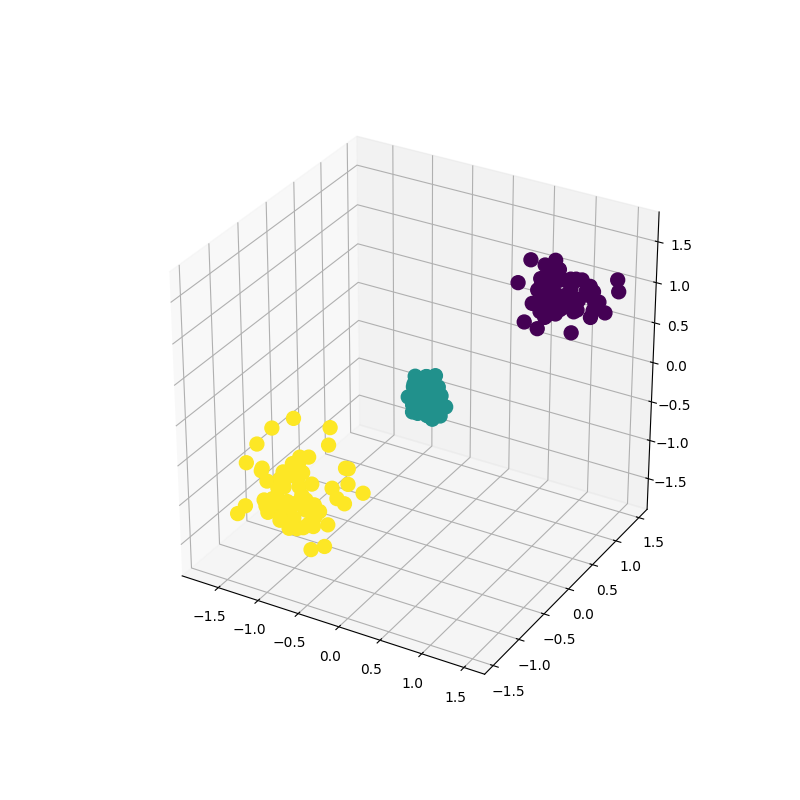

In [3]:
blobs, labels = make_blobs(n_samples=200, n_features=3, centers=[[1,1,1],[0,0,0],[-1,-1,-1]], cluster_std=[0.2,0.1,0.3])

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(blobs[:, 0], blobs[:, 1], zs=blobs[:, 2], depthshade=False, c=labels, s=100);

### PCA

Computing PCA we can see that just one component explains almost all the variance.

<IPython.core.display.Javascript object>


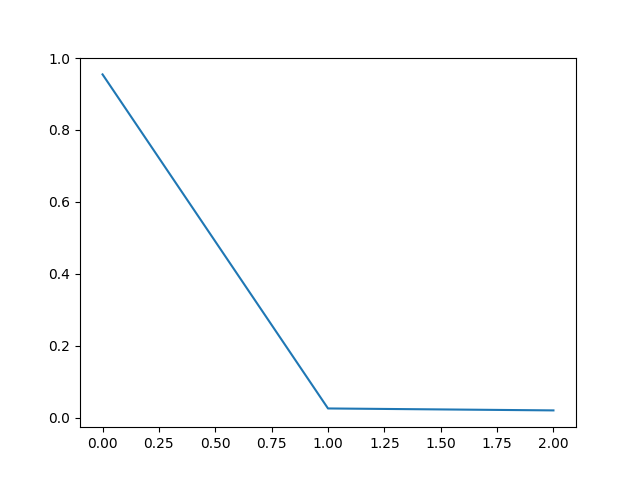

In [4]:
pca = PCA()
fdata = pca.fit_transform(blobs)
fig = plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

And as we can expect representing the PCA transformed data we can see that just one dimension is enough

<IPython.core.display.Javascript object>


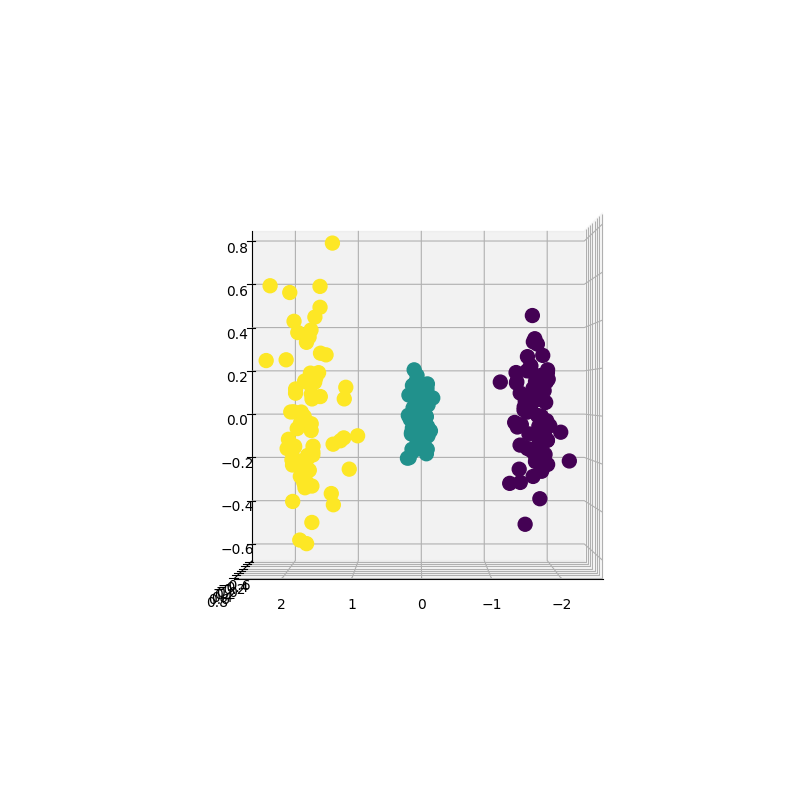

In [5]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(0, 90)
plt.scatter(fdata[:, 0], fdata[:, 1], zs=fdata[:, 2], depthshade=False, c=labels,s=100);

<IPython.core.display.Javascript object>


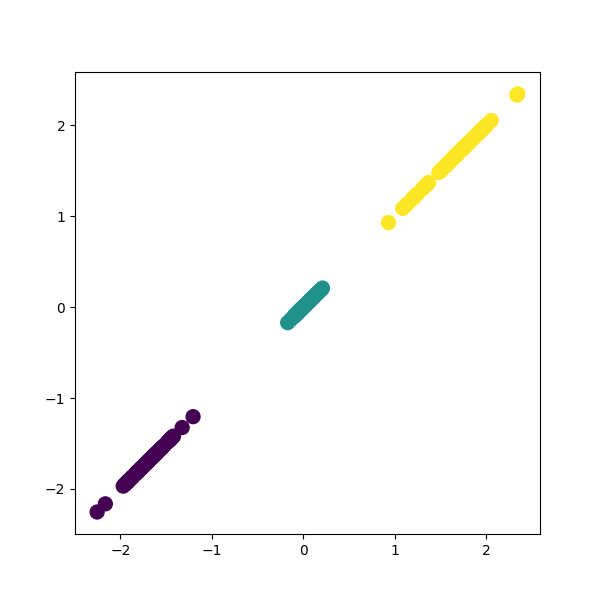

In [6]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 0], c=labels,s=100);

### ISOMAP & LLE

Using nonlinear transformations to linearly separable data sometimes has weird consequences.

First we see what happens using ISOMAP

In [7]:
@interact(nn = (5, 85, 10))
def g(nn=5):
    iso = Isomap(n_components=3, n_neighbors=nn)
    fdata = iso.fit_transform(blobs)
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(90, 90)
    plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100);

interactive(children=(IntSlider(value=5, description='nn', max=85, min=5, step=10), Output()), _dom_classes=('…

Changing the number of neigbors can change radically the result, but as they increase the transformation is equivalent to PCA

Now for Locally Linear Embedding

In [8]:
@interact(nn = (5, 85, 10))
def g(nn=5):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=3, method='standard')
    fig = plt.figure(figsize=(8,8))
    fdata = lle.fit_transform(blobs)
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(90, 90)
    plt.scatter(fdata[:, 0], fdata[:, 1], zs= fdata[:, 2], depthshade=False, c=labels, s=100);

interactive(children=(IntSlider(value=5, description='nn', max=85, min=5, step=10), Output()), _dom_classes=('…

## Nonlinear data

Now we will play with non linearly separable data. First the two moons dataset.

<IPython.core.display.Javascript object>


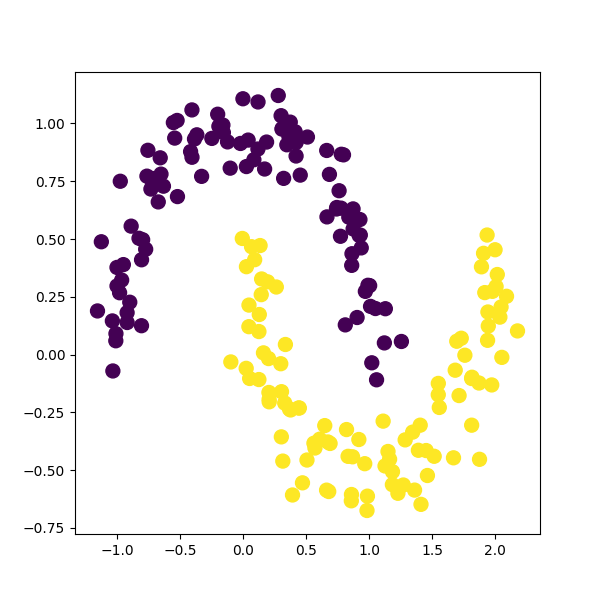

In [9]:
moons, labelsm = make_moons(n_samples=200, noise=0.1)
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(moons[:, 0], moons[:, 1], c=labelsm, s=100);

### PCA

PCA assigns most of the variance to the fist component, but the second one has still a significan amount

[0.81018393 0.18981607]


<IPython.core.display.Javascript object>


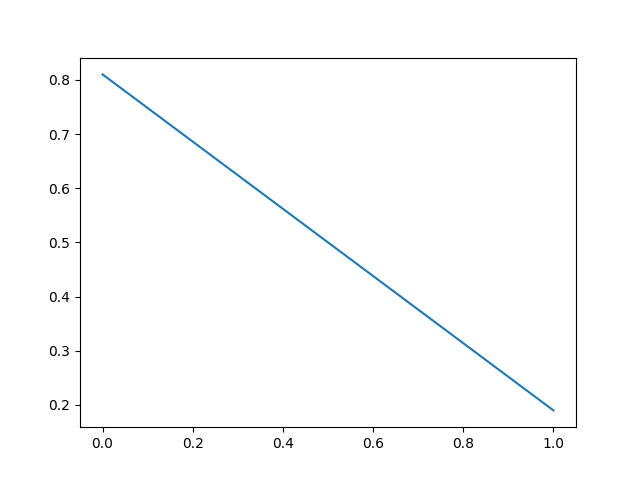

In [10]:
pca = PCA()
fdata = pca.fit_transform(moons)
print(pca.explained_variance_ratio_)
fig = plt.figure()
plt.plot(range(len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_);

And PCA does not seems to have much effect on the data

<IPython.core.display.Javascript object>


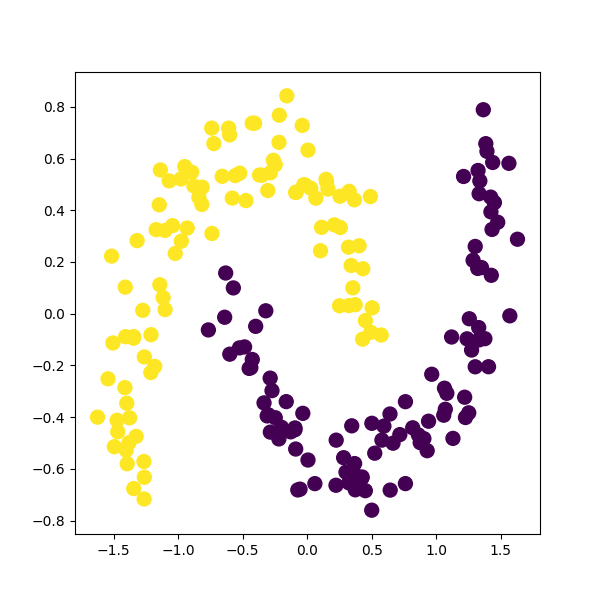

In [11]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plt.scatter(fdata[:, 0], fdata[:, 1], c=labelsm,s=100);

### ISOMAP

ISOMAP does a better job, but adjusting an adequate of neighbors to sparate the two moons requires some experimentation. Playing with the number of neighbors will results on different shapes that will converge on the original data for large values

In [12]:
@interact(nn = (1, 15, 2))
def g(nn=5):
    iso = Isomap(n_components=2, n_neighbors= nn)
    fdata = iso.fit_transform(moons)
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    plt.scatter(fdata[:, 0], fdata[:, 1], c=labelsm, s=100);

interactive(children=(IntSlider(value=5, description='nn', max=15, min=1, step=2), Output()), _dom_classes=('w…

### LLE

LLE also allows  separating both moons resulting in very different transformations depending on the number of neighbors.

In [13]:
@interact(nn = (1, 15, 2))
def g(nn=5):
    lle = LocallyLinearEmbedding(n_neighbors=nn, n_components=2, method='standard', random_state=0)
    fig = plt.figure(figsize=(6,6))
    fdata = lle.fit_transform(moons)
    print (lle.reconstruction_error_)
    ax = fig.add_subplot(111)
    plt.scatter(fdata[:, 0], fdata[:, 1],  c=labelsm, s=100);

interactive(children=(IntSlider(value=5, description='nn', max=15, min=1, step=2), Output()), _dom_classes=('w…